# Preprocessing

---
## Imports

In [1]:
import sys
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

sys.path.append('../')

from utils.duplicates import remove_rows, get_duplicates_to_delete
from utils.tensorflow_preprocessing import prepare_image_dataset
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.callbacks import ProgbarLogger

In [2]:
df = pd.read_csv('../data/processed/csv/df.csv')
duplicates = pd.read_csv('../data/processed/csv/duplicates.csv')

--- 
## Remove duplicates

### Automatically delete:
- For each duplicate group, delete all but one rows marked as "Duplicate" for each "Style".
- Outputs "df_no_dup".

In [3]:
duplicates_to_delete = get_duplicates_to_delete(duplicates)
df_no_dup = remove_rows(df, duplicates_to_delete)
df_no_dup

Identifying rows to delete...


100%|██████████| 5684/5684 [00:05<00:00, 1014.30it/s]

Removing rows...


,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian
1,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
2,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
3,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,beds,Asian
4,beds/Asian/20802asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
...,...,...,...,...,...,...,...,...
84790,tables/Victorian/5victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
84791,tables/Victorian/6victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
84792,tables/Victorian/7victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
84793,tables/Victorian/8victorian-dining-tables.jpg,jpg,350,350,1.0,RGB,tables,Victorian


### Manually delete:
- Any rows marked as "Inspect" that belongs in the wrong "Class".
- Overwrite "df", as this DataFrame will continue to be used for further preprocessing.

In [4]:
inspects = duplicates[duplicates['Duplicate_Type'] == 'Inspect']
inspects

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash
117,59,Inspect,tables/Craftsman/28467craftsman-dressers.jpg,jpg,350,350,1.0,RGB,tables,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
118,59,Inspect,beds/Craftsman/4866craftsman-bed.jpg,jpg,350,350,1.0,RGB,beds,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
289,145,Inspect,chairs/Contemporary/1181contemporary-indoor-ch...,jpg,350,350,1.0,RGB,chairs,Contemporary,eaef9014e0503bfd81510ba385fa3f419faae0429ea4c7...
290,145,Inspect,sofas/Contemporary/2852contemporary-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Contemporary,eaef9014e0503bfd81510ba385fa3f419faae0429ea4c7...
297,149,Inspect,sofas/Contemporary/409contemporary-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Contemporary,aabf7f10b544686ec442c1bb390b906f42fe6a7e913d90...
298,149,Inspect,chairs/Contemporary/1446contemporary-indoor-ch...,jpg,350,350,1.0,RGB,chairs,Contemporary,aabf7f10b544686ec442c1bb390b906f42fe6a7e913d90...
415,205,Inspect,chairs/Contemporary/870contemporary-indoor-cha...,jpg,350,350,1.0,RGB,chairs,Contemporary,eafeb034e0503af5815123e195eb27439faac54ade84c7...
416,205,Inspect,sofas/Contemporary/1293contemporary-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Contemporary,eafeb034e0503af5815123e195eb27439faac54ade84c7...
445,220,Inspect,chairs/Eclectic/5037eclectic-armchairs-and-acc...,jpg,350,350,1.0,RGB,chairs,Eclectic,ebfa3fb59050e02fc047c84a64adcdc8e48c92ff8f20c3...
446,220,Inspect,sofas/Transitional/4509transitional-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Transitional,ebfa3fb59050e02fc047c84a64adcdc8e48c92ff8f20c3...


In [5]:
total_inspect_groups = inspects["Group"].nunique(dropna=False)

In [6]:
# inspects_rows_to_delete = [91, 154, 205, 227, 235, 277, 280, 281, 287, 290, 299, 310, 318, 323, 325] # Delete one of each pair
inspects_rows_to_delete = [91, 205]  # Only delete very different class ("tables" and "beds"). Similar classes are kept ("chairs" and "sofas")

In [7]:
inspect_review = inspects.copy()
inspect_review["Duplicate_Type"] = "Keep"
# inspect_review.loc[inspects_rows_to_delete, "Duplicate_Type"] = "DELETE"

In [8]:
# visualize_duplicates(inspect_review, total_inspect_groups)

In [9]:
inspects_to_delete = inspect_review[inspect_review["Duplicate_Type"] == "DELETE"]
inspects_to_delete

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash


In [10]:
df = remove_rows(df, inspects_to_delete)
df

Removing rows...


,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,beds,Asian
...,...,...,...,...,...,...,...,...
90078,tables/Victorian/5victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
90079,tables/Victorian/6victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
90080,tables/Victorian/7victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
90081,tables/Victorian/8victorian-dining-tables.jpg,jpg,350,350,1.0,RGB,tables,Victorian


---
## Prepare DataFrame

In [11]:
# Merge the two DataFrames based on the "Path" column
merged_df = pd.merge(df, duplicates_to_delete[['Path']], on='Path', how='left', indicator=True)

# Create the "Duplicate_Type" column based on the merge indicator
merged_df['Duplicate_Type'] = merged_df['_merge'].map({'both': "Duplicate", 'left_only': "Unique"})

# Drop the merge indicator column
merged_df = merged_df.drop('_merge', axis=1)

# Update the original "df" with the new "Duplicate_Type" column
df = merged_df

In [12]:
df

,Path,Type,Width,Height,Ratio,Mode,Class,Style,Duplicate_Type
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian,Unique
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian,Unique
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian,Unique
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian,Unique
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,beds,Asian,Unique
...,...,...,...,...,...,...,...,...,...
90078,tables/Victorian/5victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian,Unique
90079,tables/Victorian/6victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian,Unique
90080,tables/Victorian/7victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian,Unique
90081,tables/Victorian/8victorian-dining-tables.jpg,jpg,350,350,1.0,RGB,tables,Victorian,Unique


---
## Split (train, validation, test)

### Prepare target and training

In [13]:
train_data = df.copy()

### Splitting

In [14]:
train_df, test_df = train_test_split(
    train_data,
    test_size=0.2,
    random_state=42
)
train_df, val_df = train_test_split(
    train_df,
    test_size=0.25,
    random_state=42
)

In [15]:
data_dir = Path('../data/processed/csv')
data_dir.mkdir(parents=True, exist_ok=True)
train_df.to_csv(data_dir / 'train_df.csv', index=False)
test_df.to_csv(data_dir / 'test_df.csv', index=False)
val_df.to_csv(data_dir / 'val_df.csv', index=False)

---
## Rescaling & Normalization
Note: Using Tensorflow for quick normalization and rescaling. In 'utils/tensorflow_preprocessing.py' file, there is a functions to normalize and rescale the each image in the dataset.

In [16]:
train_dataset, label_encoder = prepare_image_dataset(train_df, img_height=256, img_width=256, batch_size=32)
val_dataset, _ = prepare_image_dataset(val_df, img_height=256, img_width=256, batch_size=32, label_encoder=label_encoder)
test_dataset, _ = prepare_image_dataset(test_df, img_height=256, img_width=256, batch_size=32,
                                     label_encoder=label_encoder)

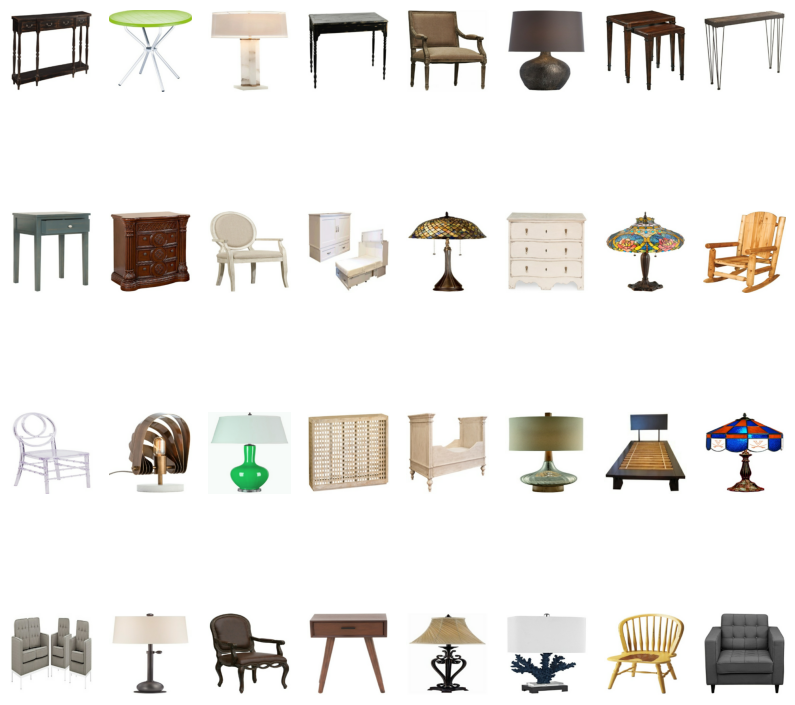

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(32):
        ax = plt.subplot(4, 8, i + 1)
        plt.imshow((images[i]*255).numpy().astype("uint8"))
        # plt.title(class_names[labels[i]])
        plt.axis("off")

---
## Test

In [19]:
model = models.Sequential([
    Input(shape=(256, 256, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    # layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [20]:
# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# # Step 4: Train the Model
epochs = 1
history = model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=[ProgbarLogger()]
)

1690/1690 ━━━━━━━━━━━━━━━━━━━━ 605s 357ms/step - accuracy: 0.7427 - loss: 5.7733


In [26]:
# # Step 5: Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_dataset, steps=len(test_dataset))
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

564/564 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.8497 - loss: 0.4847
Test Loss: 0.4730
Test Accuracy: 0.8520


In [23]:
print(train_dataset.element_spec)

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [24]:
print(test_dataset.element_spec)

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
